<div style="text-align: center"> <h1> Assignment - 9

<div style="text-align: center"> <h3>CS677 A1 Data Science with Python (Fall 2024)

<div style="text-align: center"> <h4>Submitted by: Aishwarya Malhotra (U17161095)</div>

### **Part - 1 NB, Trees & RF**

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

##### **Solution - 1.1**

In [7]:
import pandas as pd

#Load the dataset
data = pd.read_csv("cardiotocography_data_set.csv")
data = data.iloc[1:]
print(data.head())

# Combine labels into two classes: Normal (1) and Abnormal (0)
data['NSP'] = data['NSP'].map({1: 1, 2: 0, 3: 0})
data.head()

# Now you can use data_clean
data_clean = data.dropna(subset=["MSTV", "Width", "Mode", "Variance"])

       FileName        Date      SegFile      b       e    LBE     LB   AC  \
1  Variab10.txt  01-12-1996  CTG0001.txt  240.0   357.0  120.0  120.0  0.0   
2    Fmcs_1.txt  03-05-1996  CTG0002.txt    5.0   632.0  132.0  132.0  4.0   
3    Fmcs_1.txt  03-05-1996  CTG0003.txt  177.0   779.0  133.0  133.0  2.0   
4    Fmcs_1.txt  03-05-1996  CTG0004.txt  411.0  1192.0  134.0  134.0  2.0   
5    Fmcs_1.txt  03-05-1996  CTG0005.txt  533.0  1147.0  132.0  132.0  4.0   

    FM   UC  ...    C    D    E   AD   DE   LD   FS  SUSP  CLASS  NSP  
1  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  1.0   0.0    9.0  2.0  
2  0.0  4.0  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0   0.0    6.0  1.0  
3  0.0  5.0  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0   0.0    6.0  1.0  
4  0.0  6.0  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0   0.0    6.0  1.0  
5  0.0  5.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0    2.0  1.0  

[5 rows x 40 columns]


In [8]:
# Group 3
features = ["MSTV", "Width", "Mode", "Variance"]
target = data_clean["NSP"]

# Extract features from the CLEANED data
X = data_clean[features]
y = target

# Split data into 50/50 train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

##### **Solution - 2**

In [12]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

accuracy_nb = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

conf_matrix_nb = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.75
Confusion Matrix:
[[ 39 195]
 [ 69 760]]


##### **Solution - 3**

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Initialize and train Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Predict on test data
y_pred_lr = log_reg.predict(X_test)

# Compute accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr:.2f}")

# Compute confusion matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print("Logistic Regression Confusion Matrix:")
print(conf_matrix_lr)


Logistic Regression Accuracy: 0.80
Logistic Regression Confusion Matrix:
[[ 34 200]
 [ 14 815]]


##### **Solution - 4**

In [11]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train Decision Tree model
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

# Predict on test data
y_pred_dt = dtree.predict(X_test)

# Compute accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")

# Compute confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("Decision Tree Confusion Matrix:")
print(conf_matrix_dt)

Decision Tree Accuracy: 0.87
Decision Tree Confusion Matrix:
[[180  54]
 [ 79 750]]


##### **Solution - 5**

Random Forest Best Accuracy (N=3, d=5): 0.90
Random Forest Best Confusion Matrix:
[[168  66]
 [ 42 787]]


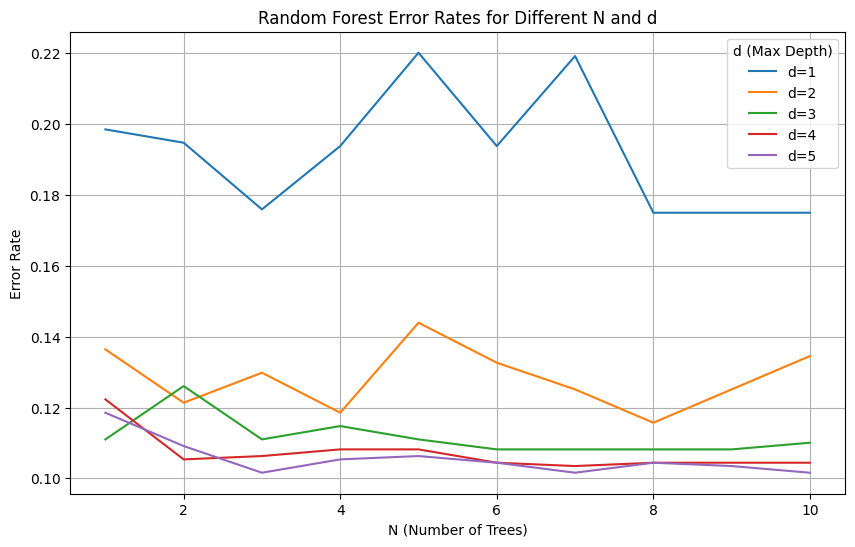

In [13]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

# Hyperparameters
n_values = range(1, 11)  # N: Number of trees
d_values = range(1, 6)   # d: Max depth of trees

# Track error rates for each combination of N and d
error_rates = []

# Loop through all combinations of N and d
for n in n_values:
    for d in d_values:
        # Initialize Random Forest with given N and d
        rf = RandomForestClassifier(n_estimators=n, max_depth=d, criterion='entropy', random_state=42)
        rf.fit(X_train, y_train)

        # Predict on test data
        y_pred_rf = rf.predict(X_test)

        # Compute error rate
        error_rate = 1 - accuracy_score(y_test, y_pred_rf)
        error_rates.append((n, d, error_rate))

# Convert to structured array for easier analysis
error_rates = np.array(error_rates, dtype=[('N', int), ('d', int), ('error', float)])

# Find the best N and d (lowest error rate)
best_combination = error_rates[np.argmin(error_rates['error'])]
best_n, best_d = best_combination['N'], best_combination['d']

# Train Random Forest with best N and d
rf_best = RandomForestClassifier(n_estimators=best_n, max_depth=best_d, criterion='entropy', random_state=42)
rf_best.fit(X_train, y_train)
y_pred_best = rf_best.predict(X_test)

# Compute accuracy for the best combination
accuracy_rf_best = accuracy_score(y_test, y_pred_best)
print(f"Random Forest Best Accuracy (N={best_n}, d={best_d}): {accuracy_rf_best:.2f}")

# Compute confusion matrix for the best combination
conf_matrix_rf_best = confusion_matrix(y_test, y_pred_best)
print("Random Forest Best Confusion Matrix:")
print(conf_matrix_rf_best)

# Plot error rates
error_matrix = np.zeros((len(n_values), len(d_values)))
for (n, d, error) in error_rates:
    error_matrix[n - 1, d - 1] = error

plt.figure(figsize=(10, 6))
for d_index, d in enumerate(d_values):
    plt.plot(n_values, error_matrix[:, d_index], label=f"d={d}")

plt.title("Random Forest Error Rates for Different N and d")
plt.xlabel("N (Number of Trees)")
plt.ylabel("Error Rate")
plt.legend(title="d (Max Depth)")
plt.grid()
plt.show()


##### **Solution - 6**

In [14]:
from sklearn.svm import SVC

# Initialize and train SVM models with different kernels
kernels = ['linear', 'poly', 'rbf']  # Linear, Polynomial (degree=2), Gaussian (RBF)
results_svm = {}

for kernel in kernels:
    if kernel == 'poly':
        model = SVC(kernel=kernel, degree=2, random_state=42)
    else:
        model = SVC(kernel=kernel, random_state=42)

    model.fit(X_train, y_train)
    y_pred_svm = model.predict(X_test)

    # Compute accuracy and confusion matrix
    accuracy_svm = accuracy_score(y_test, y_pred_svm)
    conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

    # Store results
    results_svm[kernel] = {
        'accuracy': accuracy_svm,
        'confusion_matrix': conf_matrix_svm
    }

    print(f"SVM ({kernel.capitalize()}) Accuracy: {accuracy_svm:.2f}")
    print(f"SVM ({kernel.capitalize()}) Confusion Matrix:\n{conf_matrix_svm}\n")

SVM (Linear) Accuracy: 0.79
SVM (Linear) Confusion Matrix:
[[ 15 219]
 [  5 824]]

SVM (Poly) Accuracy: 0.79
SVM (Poly) Confusion Matrix:
[[ 15 219]
 [  6 823]]

SVM (Rbf) Accuracy: 0.80
SVM (Rbf) Confusion Matrix:
[[ 34 200]
 [ 11 818]]



##### **Solution - 7**

In [16]:
import pandas as pd

# Define a function to calculate metrics from the confusion matrix
def calculate_metrics(conf_matrix):
    TP = np.diag(conf_matrix)  # True positives are diagonal elements
    FP = conf_matrix.sum(axis=0) - TP  # False positives are column sums minus TP
    FN = conf_matrix.sum(axis=1) - TP  # False negatives are row sums minus TP
    TN = conf_matrix.sum() - (FP + FN + TP)  # Total minus FP, FN, and TP
    accuracy = TP.sum() / conf_matrix.sum()  # Overall accuracy
    TPR = TP / (TP + FN)  # True positive rate
    TNR = TN / (TN + FP)  # True negative rate

    return TP, FP, TN, FN, accuracy, TPR.mean(), TNR.mean()

# Collect results for each model
models = [
    ("Naive Bayesian", conf_matrix_nb, accuracy_nb),
    ("Logistic Regression", conf_matrix_lr, accuracy_lr),
    ("Decision Tree", conf_matrix_dt, accuracy_dt),
    ("Random Forest (Best)", conf_matrix_rf_best, accuracy_rf_best)
]

# Add SVM results
for kernel, result in results_svm.items():
    models.append((f"SVM ({kernel.capitalize()})", result['confusion_matrix'], result['accuracy']))

# Create a summary table
summary = []
for name, conf_matrix, accuracy in models:
    TP, FP, TN, FN, acc, TPR, TNR = calculate_metrics(conf_matrix)
    summary.append([name, TP.sum(), FP.sum(), TN.sum(), FN.sum(), acc, TPR, TNR])

# Convert to DataFrame for better visualization
columns = ["Model", "TP", "FP", "TN", "FN", "Accuracy", "TPR", "TNR"]
summary_df = pd.DataFrame(summary, columns=columns)

# Print summary table
display(summary_df)


,Model,TP,FP,TN,FN,Accuracy,TPR,TNR
0,Naive Bayesian,799,264,799,264,0.751646,0.541717,0.541717
1,Logistic Regression,849,214,849,214,0.798683,0.564206,0.564206
2,Decision Tree,930,133,930,133,0.874882,0.836968,0.836968
3,Random Forest (Best),955,108,955,108,0.898401,0.833643,0.833643
4,SVM (Linear),839,224,839,224,0.789276,0.529036,0.529036
5,SVM (Poly),838,225,838,225,0.788335,0.528432,0.528432
6,SVM (Rbf),852,211,852,211,0.801505,0.566015,0.566015


##### **Solution - 8**

In [17]:
importances = rf_best.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)


    Feature  Importance
0      MSTV    0.427081
2      Mode    0.324896
3  Variance    0.127528
1     Width    0.120495


In [18]:
coef = log_reg.coef_[0]
feature_coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coef
}).sort_values(by='Coefficient', ascending=False)

print(feature_coef_df)


    Feature  Coefficient
0      MSTV     1.417438
2      Mode     0.023264
1     Width     0.010926
3  Variance    -0.040304


In [43]:
pip install shap

### **Part 2 - SVM**

In [22]:
df = pd.read_excel("META_weekly_return_detailed.xlsx")

In [23]:
# Looking at the dataframe
df

,Open,High,Low,Close,Adj Close,Volume,Return,Date,Week_Number,Year,Day,Weekday,mean_return,volatility,Label
0,358.989990,360.000000,351.820007,353.959992,352.897461,14980500,-1.217,2023-12-29,52,2023,29,Friday,0.043000,0.889220,Green
1,359.700012,361.899994,357.809998,358.320007,357.244385,11798800,0.137,2023-12-28,52,2023,28,Thursday,0.043000,0.889220,Green
2,356.070007,359.000000,355.309998,357.829987,356.755859,13207900,0.845,2023-12-27,52,2023,27,Wednesday,0.043000,0.889220,Green
3,354.989990,356.980011,353.450012,354.829987,353.764832,9898600,0.407,2023-12-26,52,2023,26,Tuesday,0.043000,0.889220,Green
4,355.579987,357.200012,351.220001,353.390015,352.329193,11764200,-0.198,2023-12-22,51,2023,22,Friday,1.086600,1.349914,Green
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,139.889999,143.139999,139.539993,142.529999,142.102158,26263800,3.245,2019-01-08,1,2019,8,Tuesday,0.842400,1.456660,NaN
1254,137.559998,138.869995,135.910004,138.050003,137.635590,20089300,0.072,2019-01-07,1,2019,7,Monday,0.842400,1.456660,NaN
1255,134.009995,138.000000,133.750000,137.949997,137.535889,29002100,4.714,2019-01-04,0,2019,4,Friday,0.603333,3.844670,NaN
1256,134.690002,137.169998,131.119995,131.740005,131.344528,22717900,-2.904,2019-01-03,0,2019,3,Thursday,0.603333,3.844670,NaN


In [24]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score

feature_values = df[df['Year'].isin([2022, 2023])].groupby(['Week_Number', 'Year']).agg(
    mean = ('mean_return', lambda x: round(x.mean()* 100,2)),
    std = ('Return', lambda x: round(x.std()* 100,2)),
    Label = ('Label', 'first'),
).reset_index()

feature_values.head(10)

# Split data into Year 1 and Year 2
year_1 = feature_values[feature_values['Year'] == 2022]
year_2 = feature_values[feature_values['Year'] == 2023]

In [26]:
feature_values

,Week_Number,Year,mean,std,Label
0,1,2022,-25.22,226.54,Red
1,1,2023,196.30,167.29,Green
2,2,2022,1.86,172.80,Red
3,2,2023,105.88,160.29,Green
4,3,2022,-221.70,234.53,Red
...,...,...,...,...,...
99,50,2023,14.30,180.34,Green
100,51,2022,-20.06,286.58,Green
101,51,2023,108.66,134.99,Green
102,52,2022,50.48,239.57,Green


In [25]:
# Features and labels
X_train = year_1[['mean', 'std']]
y_train = year_1['Label']
X_test = year_2[['mean', 'std']]
y_test = year_2['Label']



##### **Solution - 1 Linear SVM**

In [27]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

# Linear SVM
linear_svm = SVC(kernel='linear', random_state=42)
linear_svm.fit(X_train, y_train)

# Predict for year 2
y_pred_linear = linear_svm.predict(X_test)

# Compute accuracy
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print(f"Linear SVM Accuracy: {accuracy_linear:.2f}")

# Compute confusion matrix
conf_matrix_linear = confusion_matrix(y_test, y_pred_linear, labels=['Red', 'Green'])
print("Confusion Matrix (Linear SVM):\n", conf_matrix_linear)

# True positive rate (TPR) and true negative rate (TNR)
tp = conf_matrix_linear[1, 1]  # True positives (Green predicted as Green)
fn = conf_matrix_linear[1, 0]  # False negatives (Green predicted as Red)
tn = conf_matrix_linear[0, 0]  # True negatives (Red predicted as Red)
fp = conf_matrix_linear[0, 1]  # False positives (Red predicted as Green)

tpr = tp / (tp + fn)  # Sensitivity or Recall
tnr = tn / (tn + fp)  # Specificity
print(f"True Positive Rate (TPR): {tpr:.2f}")
print(f"True Negative Rate (TNR): {tnr:.2f}")


Linear SVM Accuracy: 0.79
Confusion Matrix (Linear SVM):
 [[10  8]
 [ 3 31]]
True Positive Rate (TPR): 0.91
True Negative Rate (TNR): 0.56


##### **Solution - 4 Gaussian SVM**

In [28]:
# Gaussian SVM
gaussian_svm = SVC(kernel='rbf', random_state=42)
gaussian_svm.fit(X_train, y_train)

# Predict for year 2
y_pred_gaussian = gaussian_svm.predict(X_test)

# Compute accuracy
accuracy_gaussian = accuracy_score(y_test, y_pred_gaussian)
print(f"Gaussian SVM Accuracy: {accuracy_gaussian:.2f}")

# Compare accuracies
if accuracy_gaussian > accuracy_linear:
    print("Gaussian SVM performs better than Linear SVM")
else:
    print("Linear SVM performs better than Gaussian SVM")


Gaussian SVM Accuracy: 0.73
Linear SVM performs better than Gaussian SVM


##### **Solution - 5 Polynomial SVM**

In [29]:
# Polynomial SVM (degree 2)
poly_svm = SVC(kernel='poly', degree=2, random_state=42)
poly_svm.fit(X_train, y_train)

# Predict for year 2
y_pred_poly = poly_svm.predict(X_test)

# Compute accuracy
accuracy_poly = accuracy_score(y_test, y_pred_poly)
print(f"Polynomial SVM (Degree 2) Accuracy: {accuracy_poly:.2f}")

# Compare accuracies
if accuracy_poly > accuracy_linear:
    print("Polynomial SVM performs better than Linear SVM")
else:
    print("Linear SVM performs better than Polynomial SVM")


Polynomial SVM (Degree 2) Accuracy: 0.65
Linear SVM performs better than Polynomial SVM


##### **Solution - 6 Trading Strategy with Buy & Hold**

In [38]:
# Trading strategy
initial_capital = 100  # Starting capital in dollars
capital = initial_capital

for i, label in enumerate(y_pred_linear):
    weekly_return = X_test.iloc[i]['mean'] / 100  # Convert return from percentage to decimal
    if label == "Green":  # Buy during Green weeks
        capital *= (1 + weekly_return)  # Invest in the market
    elif label == "Red":  # Sell during Red weeks
        capital *= (1 - weekly_return)

print(f"Final capital using Linear SVM strategy: ${capital:.2f}")

# Buy-and-hold strategy
buy_and_hold_capital = initial_capital * (1 + (X_test['mean'].sum() / 100))
print(f"Final capital using Buy-and-Hold strategy: ${buy_and_hold_capital:.2f}")

# Compare strategies
if capital > buy_and_hold_capital:
    print("Linear SVM trading strategy results in higher returns than Buy-and-Hold.")
else:
    print("Buy-and-Hold strategy results in higher returns than Linear SVM trading strategy.")


Final capital using Linear SVM strategy: $139320441007224.06
Final capital using Buy-and-Hold strategy: $2509.98
Linear SVM trading strategy results in higher returns than Buy-and-Hold.
